**Data:** U.S. Bureau of Labor Statistics, Producer Price Index by Industry: Synthetic Rubber Manufacturing: Primary Products [PCU325212325212P], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCU325212325212P, September 20, 2024. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\FRED_PCU325212325212P.csv"
df = pd.read_csv(path)

df.head()

,DATE,PCU325212325212P
0,1981-06-01,100.0
1,1981-07-01,100.1
2,1981-08-01,100.9
3,1981-09-01,100.9
4,1981-10-01,101.3


In [32]:
df.columns = ['date', 'synthetic_rubber']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              519 non-null    object 
 1   synthetic_rubber  519 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.2+ KB


In [33]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              519 non-null    datetime64[ns]
 1   synthetic_rubber  519 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 KB


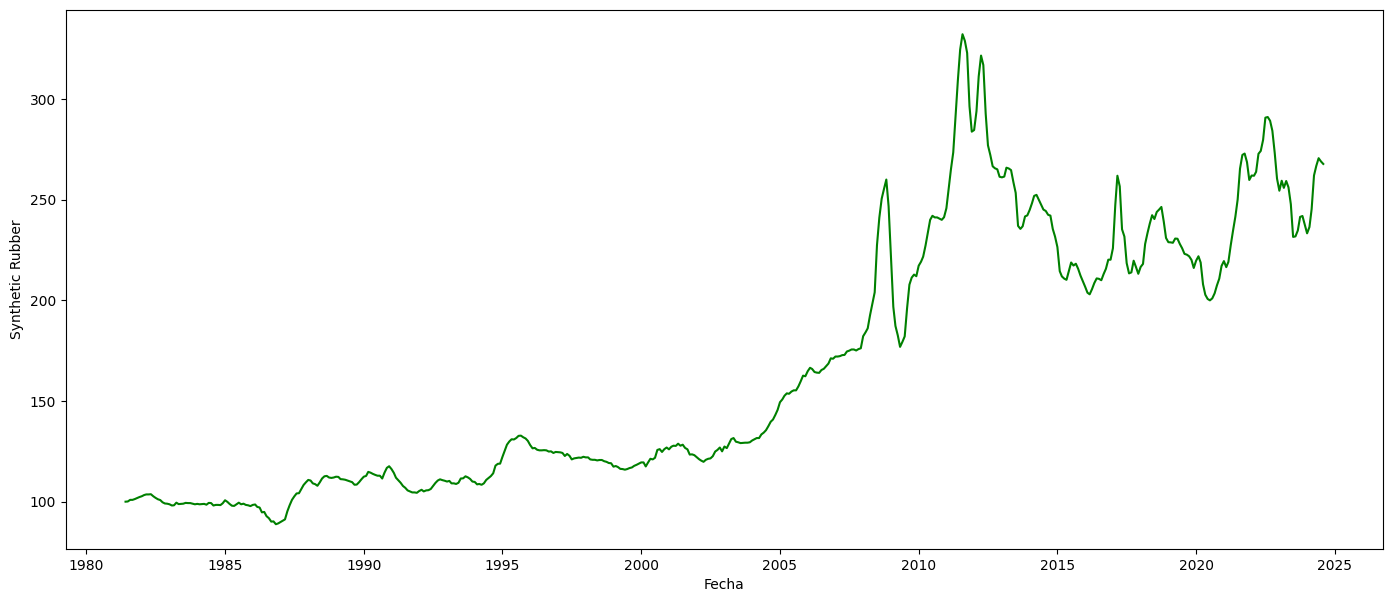

In [34]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df['date'], df['synthetic_rubber'], c='green')
ax.set_xlabel('Fecha')
ax.set_ylabel('Synthetic Rubber')
plt.show()

In [35]:
df['date_year'] = df['date'].dt.year
df.head()

,date,synthetic_rubber,date_year
0,1981-06-01,100.0,1981
1,1981-07-01,100.1,1981
2,1981-08-01,100.9,1981
3,1981-09-01,100.9,1981
4,1981-10-01,101.3,1981


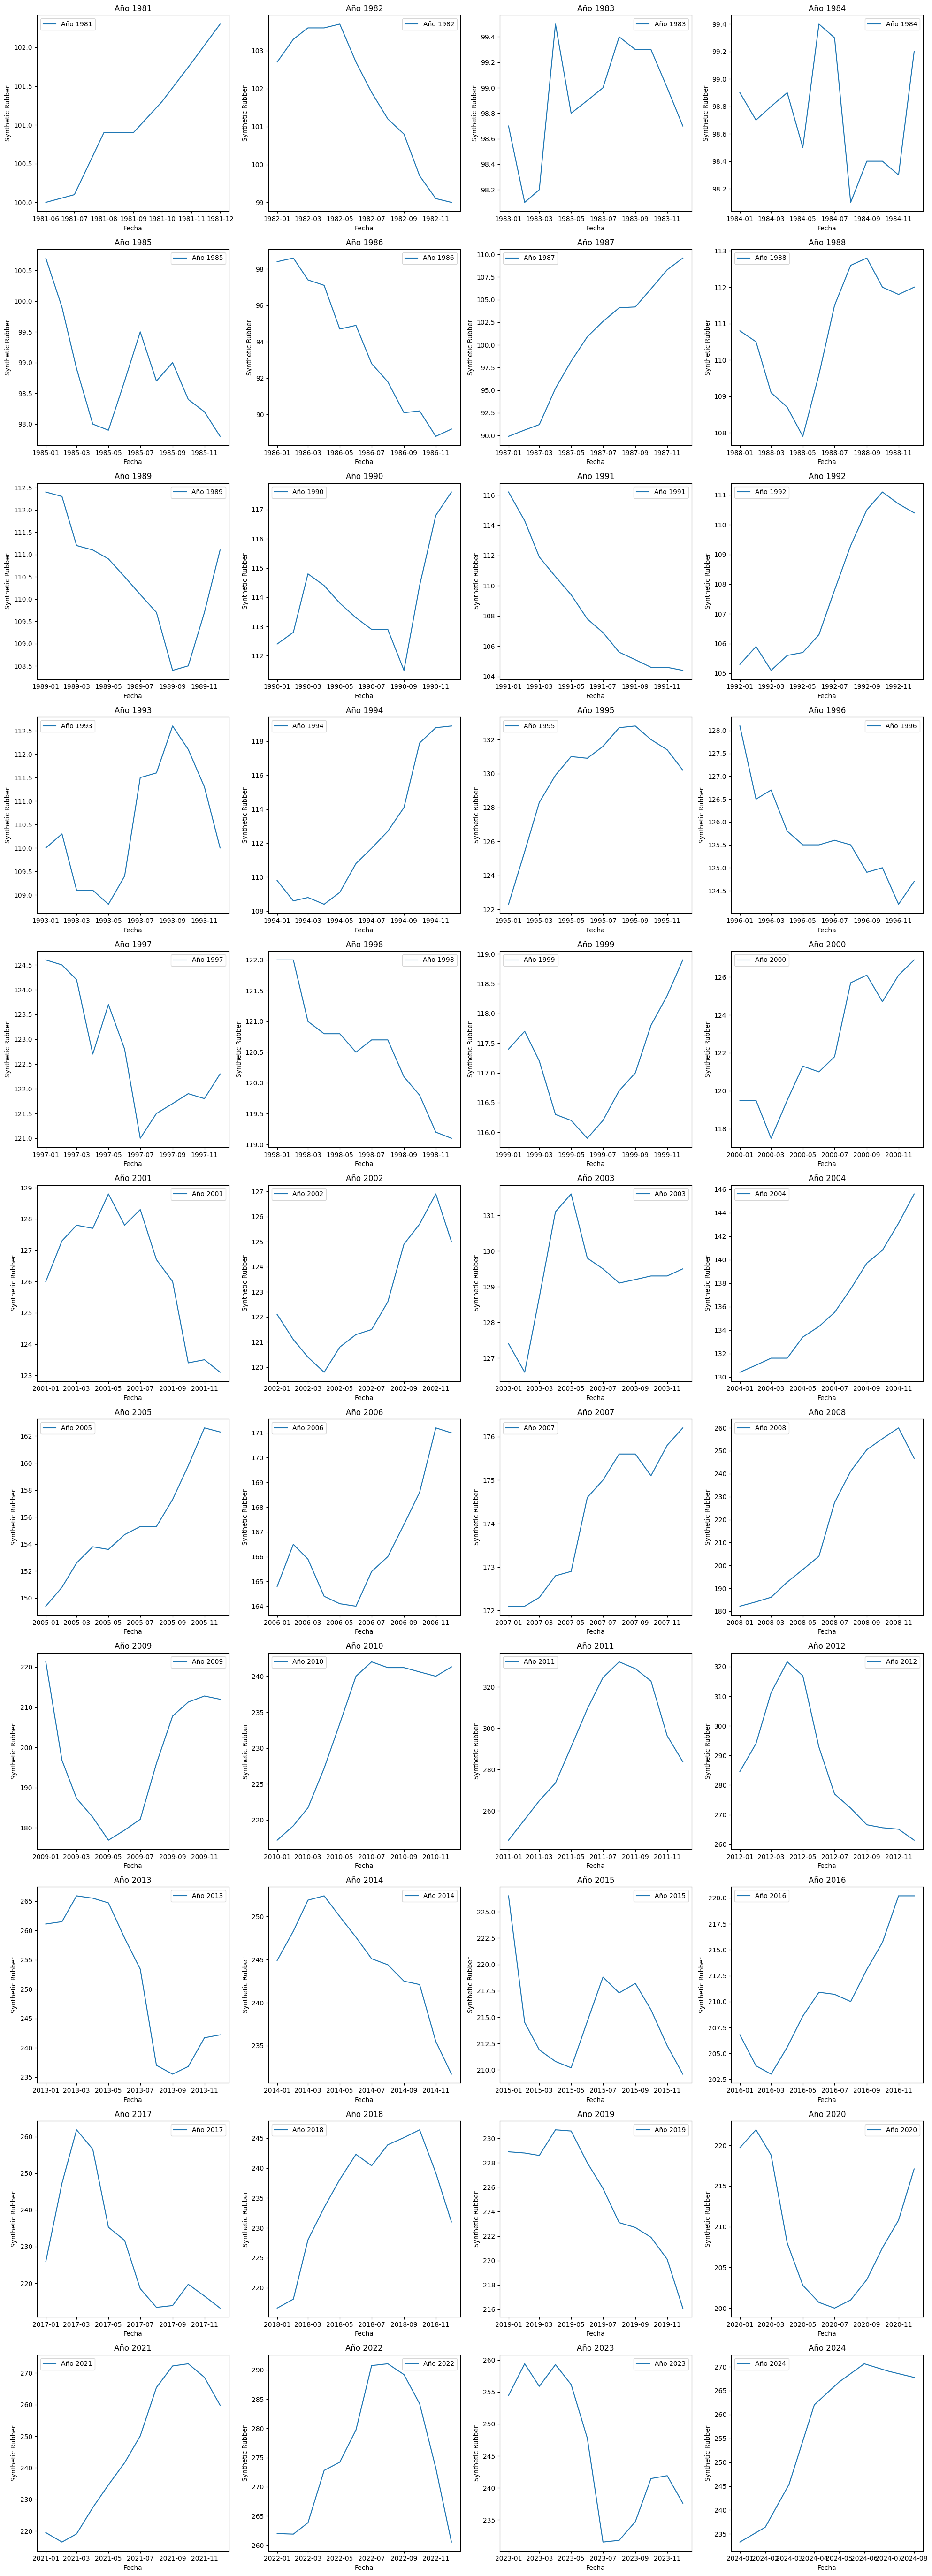

In [36]:
# Definir el número de gráficos por fila (ncols) y filas necesarias (nrows).
ncols = 4  # Número de columnas (gráficos por fila).
nrows = (len(df['date_year'].unique()) + ncols - 1) // ncols  # Número de filas necesarias.

# Crear un canvas con los subplots (figura con varios gráficos).
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

# Aplanar los ejes para iterar fácilmente si hay más de un gráfico.
axes = axes.flatten()

# Iterar por cada año y graficar.
for i, year in enumerate(sorted(df['date_year'].unique())):
    df_year = df[df['date_year'] == year]
    
    # Graficar la serie para el año correspondiente.
    axes[i].plot(df_year['date'], df_year['synthetic_rubber'], label=f'Año {year}')
    
    # Configurar título y etiquetas.
    axes[i].set_title(f'Año {year}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Synthetic Rubber')
    axes[i].legend()
# Eliminar cualquier subplot vacío (si sobran espacios en la cuadrícula)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos.
plt.tight_layout()
plt.show()

In [37]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

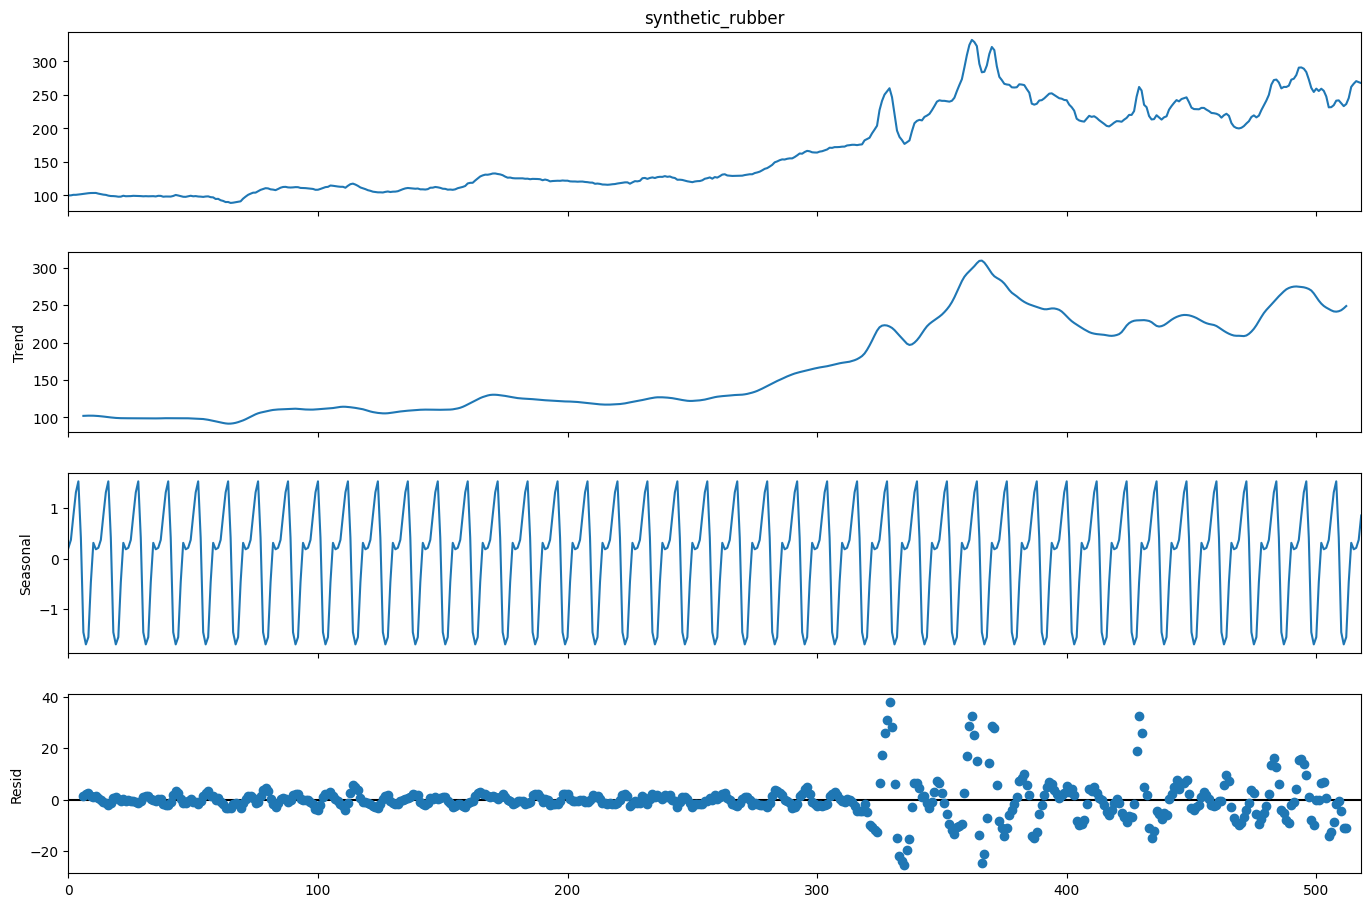

In [38]:
# decomposition (additive)
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12) 
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

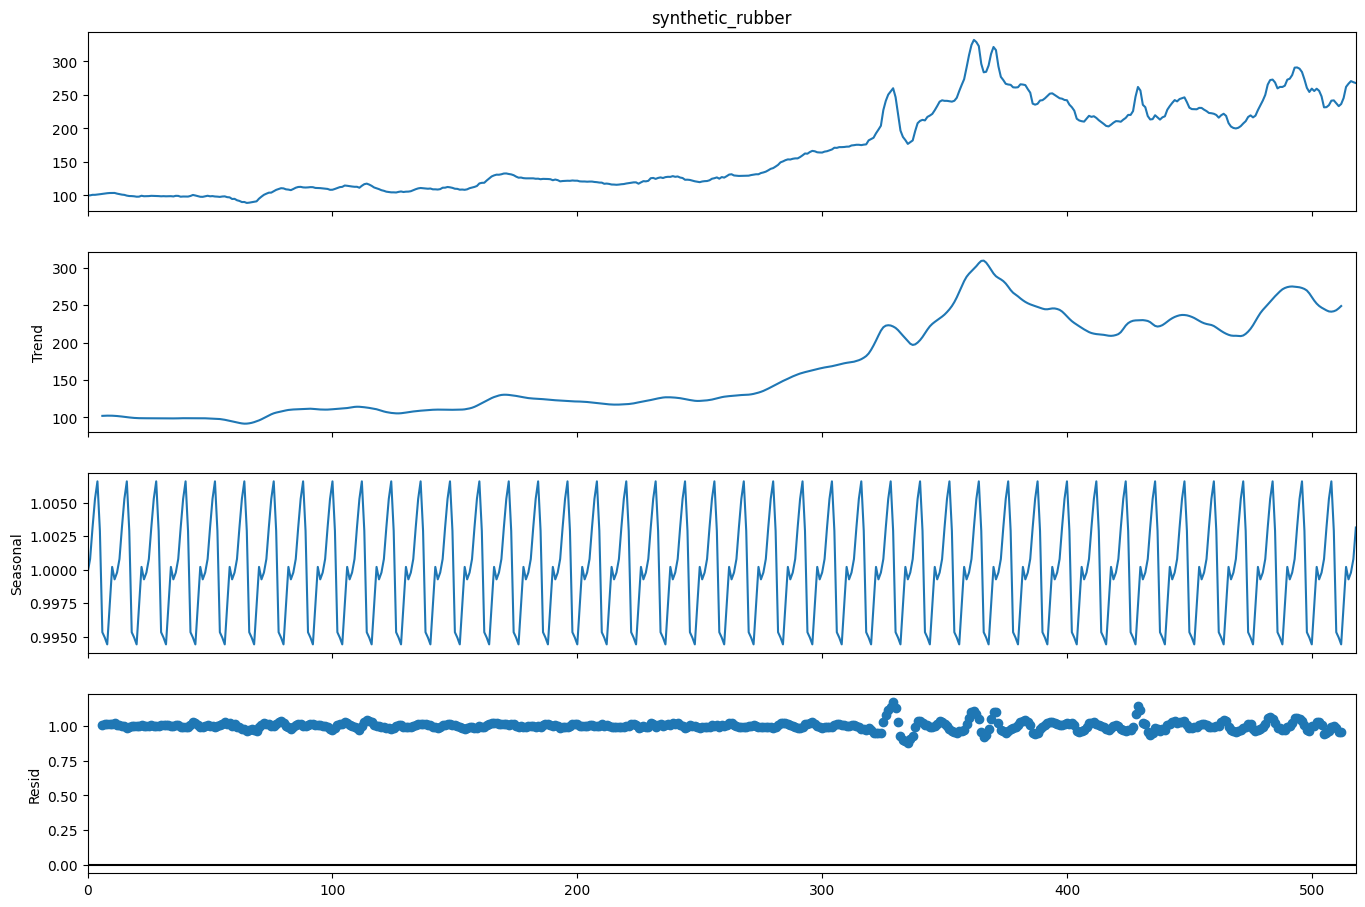

In [39]:
# decomposition (additive)
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12, model='multiplicative') 
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

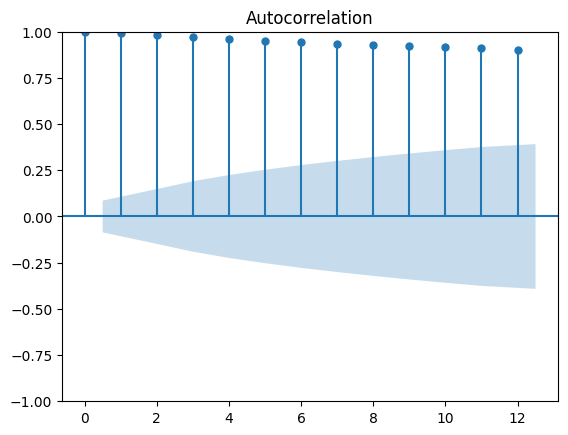

In [40]:
plot_acf(df['synthetic_rubber'], lags = 12)
print()

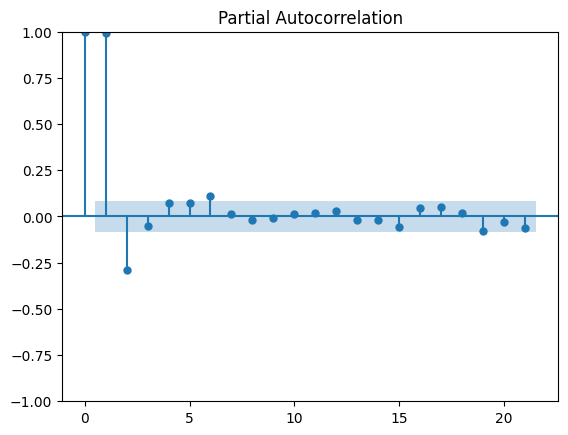

In [41]:
plot_pacf(df['synthetic_rubber'], lags = 21)
print()

In [42]:
X = df['synthetic_rubber']
split =  int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:')
print('chunk1: %.2f vs chunk2: %.2f' % (mean1, mean2))
print('variance:')
print('chunk1: %.2f vs chunk2: %.2f' % (var1, var2))

mean:
chunk1: 111.79 vs chunk2: 219.30
variance:
chunk1: 116.31 vs chunk2: 2145.07


In [43]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.955296
p-value: 0.769218
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [44]:
decomposition = seasonal_decompose(X, model='additive', period =12)
result = adfuller(decomposition.trend[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.278739
p-value: 0.928462


In [45]:
result = adfuller(decomposition.seasonal[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1878084280831997.500000
p-value: 0.000000


In [46]:
result = adfuller(decomposition.resid[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.941262
p-value: 0.000000


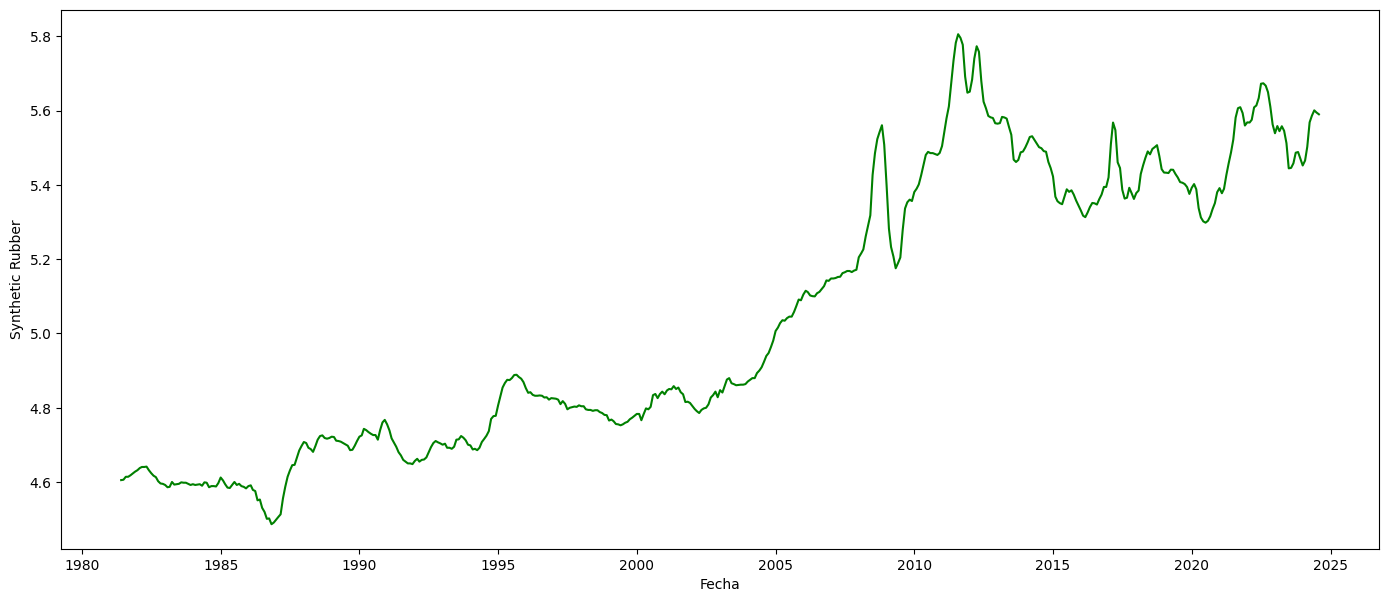

In [47]:
df['synthetic_rubber2'] = np.log(df['synthetic_rubber'])
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df['date'], df['synthetic_rubber2'], c='green')
ax.set_xlabel('Fecha')
ax.set_ylabel('Synthetic Rubber')
plt.show()

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

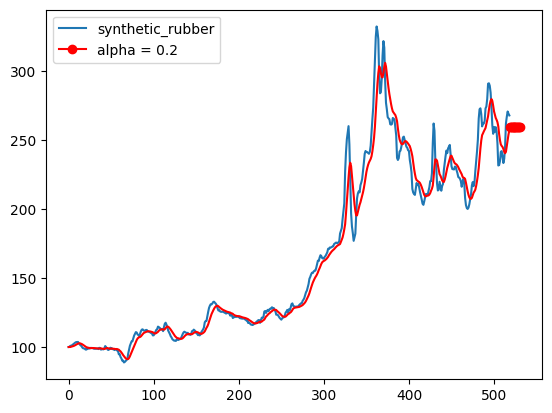

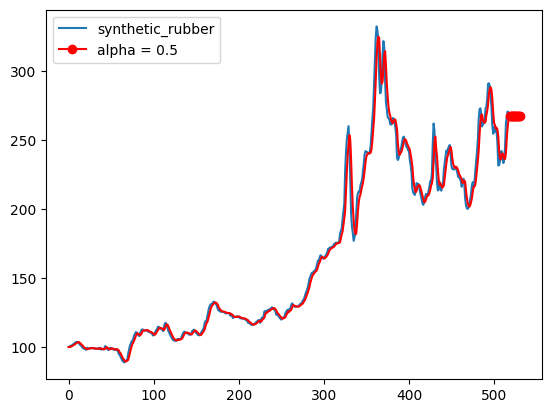

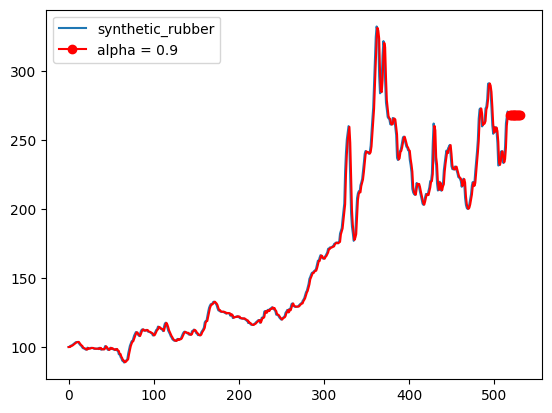

In [49]:
df_2 = df[['synthetic_rubber']]
for alpha_sm in [0.2 , 0.5, 0.9]:
    df_2.plot.line()
    fit1 = SimpleExpSmoothing(df_2).fit(smoothing_level = alpha_sm  ,optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(  color='red')
    plt.show()

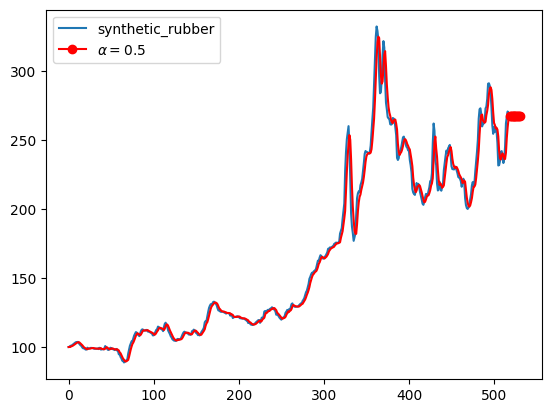

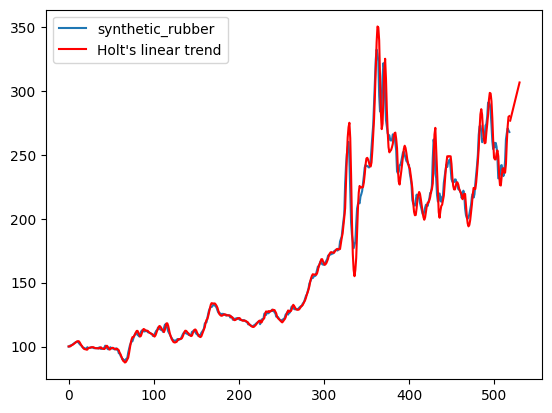

In [50]:
alpha = 0.5
df_2.plot.line()
fit1 = SimpleExpSmoothing(df_2).fit(smoothing_level= alpha,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

df_2.plot.line()

fit1 = Holt(df_2).fit(smoothing_level=0.5, smoothing_trend=0.5, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")
fit1.fittedvalues.plot(color='red')
fcast1.plot(color='red', legend=True)

plt.show()

<Axes: >

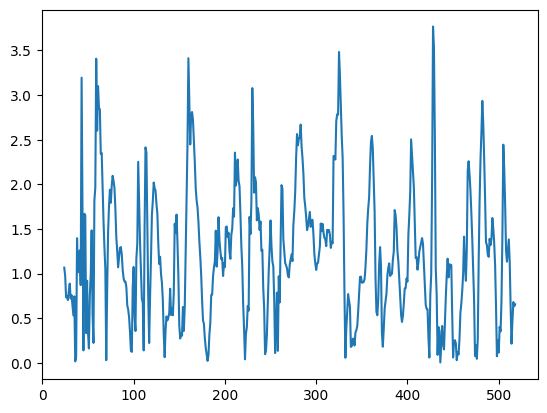

In [51]:
# pick a window size 
window_size = 25

# calculate rolling mean and standard deviation
xroll = df['synthetic_rubber'].rolling(window_size)
df['mean_roll'] = xroll.mean()
df['sd_roll'] = xroll.std()

# calculate the Z-score
df['zscore'] = np.abs( (df['synthetic_rubber'] - df['mean_roll']) / df['sd_roll'])
df['zscore'].plot()

In [52]:
df.loc[df['zscore'] > 3][['date', 'synthetic_rubber']]

,date,synthetic_rubber
43,1985-01-01,100.7
59,1986-05-01,94.7
61,1986-07-01,92.8
160,1994-10-01,117.9
230,2000-08-01,125.7
325,2008-07-01,227.4
326,2008-08-01,241.1
428,2017-02-01,247.3
429,2017-03-01,261.9


In [55]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\FRED_PCU325212325212P.csv"
df = pd.read_csv(path)
df.columns = ['date', 'synthetic_rubber']
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

df.head()

,synthetic_rubber
date,
1981-06-01,100.0
1981-07-01,100.1
1981-08-01,100.9
1981-09-01,100.9
1981-10-01,101.3


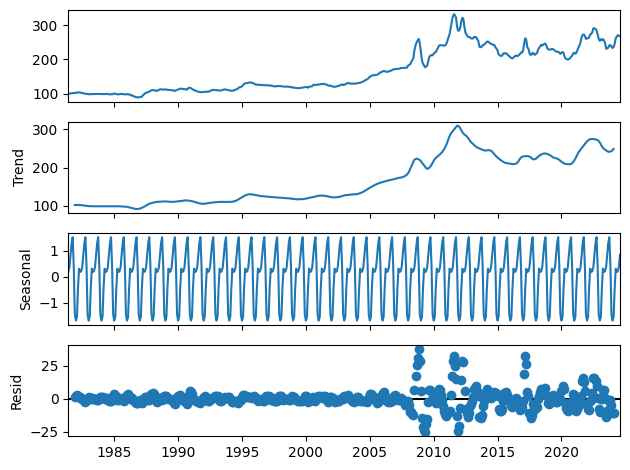

In [56]:
decomposition = sm.tsa.seasonal_decompose(df,period =12) 
figure = decomposition.plot()
plt.show()

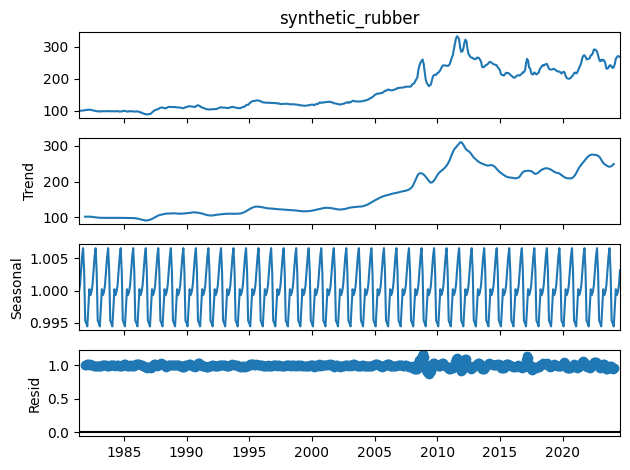

In [58]:
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

In [59]:
cutoff_date = '2015-12-31'
xtrain, xvalid  = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(415, 1) (104, 1)


In [64]:
fit1 = ExponentialSmoothing(xtrain['synthetic_rubber'].values, seasonal_periods=12, trend='mul', seasonal='mul', use_boxcox=True)
fit1 = fit1.fit()
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.959643,True
smoothing_trend,beta,0.514094,True
smoothing_seasonal,gamma,0.040357,True
initial_level,l.0,0.557159,True
initial_trend,b.0,0.999999,True
initial_seasons.0,s.0,1.000001,True
initial_seasons.1,s.1,1.000002,True
initial_seasons.2,s.2,0.999999,True
initial_seasons.3,s.3,1.000000,True
initial_seasons.4,s.4,0.999999,True


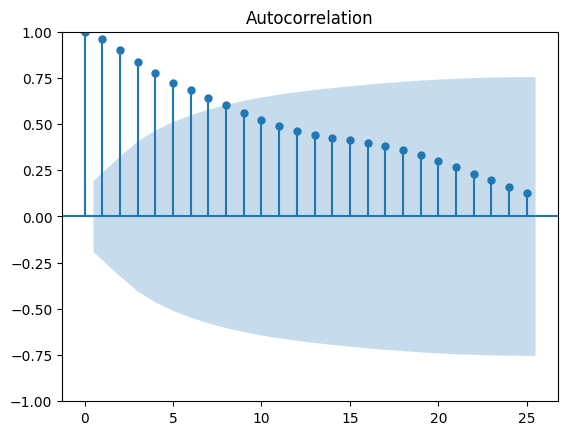

In [65]:
# What do the residuals look like?
prediction = fit1.forecast(len(xvalid)).copy()

xresiduals = xvalid['synthetic_rubber'] - prediction
plot_acf(xresiduals, lags = 25)
print()

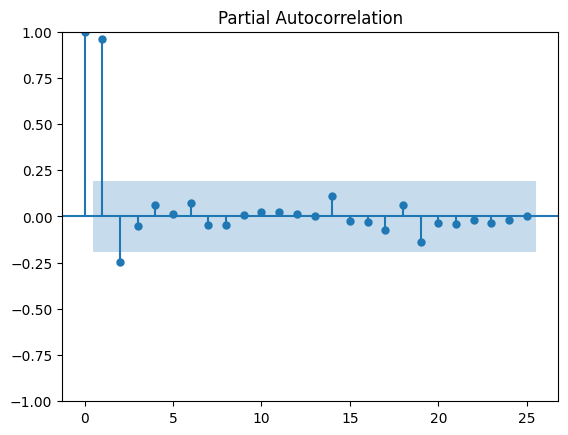

In [66]:
plot_pacf(xresiduals, lags = 25)
print()

C:\Users\HP\AppData\Local\Temp\ipykernel_20512\4205454841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xvalid['prediction'] = prediction


<Axes: xlabel='date'>

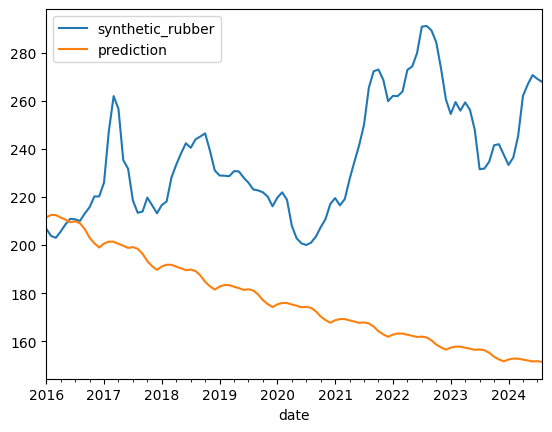

In [67]:
xvalid['prediction'] = prediction
xvalid.plot()